In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import re

# Load the dataset
file_path = '/Users/pintoza/Desktop/dev/data-science/walmart-proximity/data/processed/cleaned_time_distance_sample.csv' 
data = pd.read_csv(file_path)

In [42]:
data

,origin,destination,ruca,great_circle_distance,travel_time
0,"41.295893,-93.104232","41.687183,-93.772041",Suburban,43.879933,55
1,"38.763463,-77.186063","38.960109,-78.187619",Urban,55.570371,69
2,"44.12036,-69.24005","43.837601,-70.445011",Rural,63.014078,97
3,"47.529679,-100.271687","48.820912,-100.439464",Rural,89.549923,108
4,"43.54195,-114.31008","42.694082,-114.515923",Urban,59.494815,75
...,...,...,...,...,...
4171,"41.080474,-73.930179","40.714554,-75.281048",Urban,74.943438,101
4172,"37.87715,-122.17969","37.688028,-122.130538",Urban,13.339899,22
4173,"42.37314,-73.36761","41.745546,-72.16826",Suburban,75.269072,110
4174,"37.688601,-76.361585","36.912713,-76.252393",Rural,53.943615,95


In [43]:
# Basic info and statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   origin                 4176 non-null   object 
 1   destination            4176 non-null   object 
 2   ruca                   4176 non-null   object 
 3   great_circle_distance  4176 non-null   float64
 4   travel_time            4176 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 163.3+ KB
None
       great_circle_distance  travel_time
count            4176.000000  4176.000000
mean               57.717364    84.048851
std                22.887442    34.740620
min                 0.630309     1.000000
25%                41.401047    61.000000
50%                61.871473    86.000000
75%                76.947995   106.000000
max                89.983707   428.000000


/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


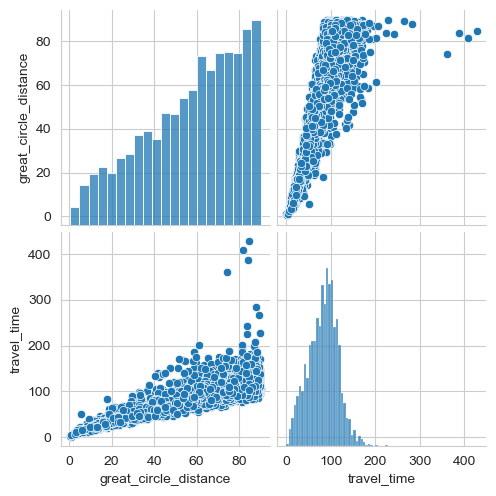

In [44]:
# Visualizing the relationships
sns.pairplot(data)
plt.show()

In [45]:
data[['travel_time', 'great_circle_distance']].corr()

,travel_time,great_circle_distance
travel_time,1.000000,0.841026
great_circle_distance,0.841026,1.000000


In [46]:
outliers = data.sort_values(by=['great_circle_distance', 'travel_time'], ascending=[False, True])
outliers

,origin,destination,ruca,great_circle_distance,travel_time
184,"33.905323,-81.335083","35.078844,-80.649828",Urban,89.983707,108
3155,"38.885559,-77.014429","40.07395,-76.325381",Urban,89.956772,125
2382,"39.547797,-115.993806","40.840442,-115.792789",Rural,89.941095,99
555,"38.061943,-96.144795","37.434169,-94.702624",Suburban,89.938626,128
2001,"39.05612,-98.53646","39.017865,-96.861527",Rural,89.927194,94
...,...,...,...,...,...
2325,"47.31764,-119.55365","47.30394,-119.540802",Suburban,1.121732,4
3182,"41.552893,-72.992749","41.563347,-73.00491",Urban,0.957620,4
854,"37.77394,-89.02646","37.785686,-89.028097",Urban,0.816480,1
570,"44.859117,-74.288237","44.849297,-74.288642",Urban,0.678787,3


In [47]:
filtered_data = data[(data['travel_time']) < 150]

# Display the shape of the data before and after removing outliers
original_shape = data.shape
filtered_shape = filtered_data.shape

original_shape, filtered_shape

((4176, 5), (4071, 5))

In [48]:
data = filtered_data
data[['travel_time', 'great_circle_distance']].corr()

,travel_time,great_circle_distance
travel_time,1.000000,0.899818
great_circle_distance,0.899818,1.000000


In [49]:
data_encoded = pd.get_dummies(data, columns=['ruca'])
data = data_encoded

In [50]:
data

,origin,destination,great_circle_distance,travel_time,ruca_Rural,ruca_Suburban,ruca_Urban
0,"41.295893,-93.104232","41.687183,-93.772041",43.879933,55,False,True,False
1,"38.763463,-77.186063","38.960109,-78.187619",55.570371,69,False,False,True
2,"44.12036,-69.24005","43.837601,-70.445011",63.014078,97,True,False,False
3,"47.529679,-100.271687","48.820912,-100.439464",89.549923,108,True,False,False
4,"43.54195,-114.31008","42.694082,-114.515923",59.494815,75,False,False,True
...,...,...,...,...,...,...,...
4171,"41.080474,-73.930179","40.714554,-75.281048",74.943438,101,False,False,True
4172,"37.87715,-122.17969","37.688028,-122.130538",13.339899,22,False,False,True
4173,"42.37314,-73.36761","41.745546,-72.16826",75.269072,110,False,True,False
4174,"37.688601,-76.361585","36.912713,-76.252393",53.943615,95,True,False,False


/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_st

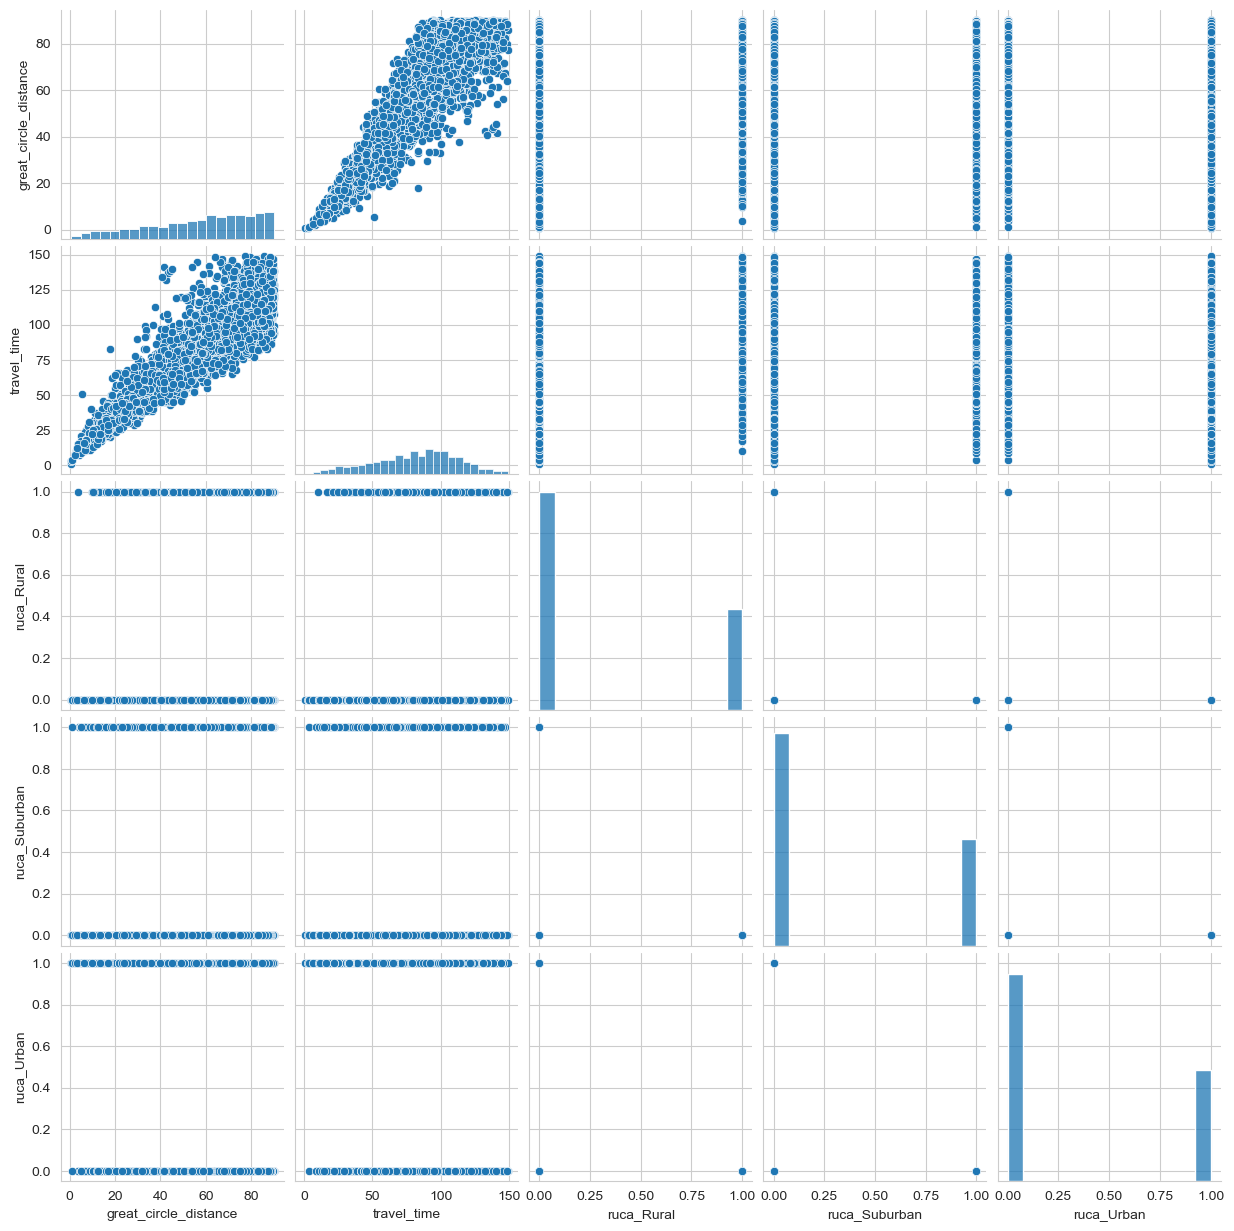

In [51]:
sns.pairplot(data)
plt.show()

In [52]:
# Including great circle distance in the model
X = data[['great_circle_distance', 'ruca_Rural', 'ruca_Suburban', 'ruca_Urban']]
y = data['travel_time']

# Create the regression model
model = LinearRegression()
model.fit(X, y)

# Predict and calculate R-squared for the combined model
predictions = model.predict(X)
r_squared = r2_score(y, predictions)
print("R-squared with Great Circle Distance and RUCA classifications:", r_squared)

R-squared with Great Circle Distance and RUCA classifications: 0.8114635110158216


In [53]:
# Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Intercept
print(f"Intercept: {model.intercept_}")

                       Coefficient
great_circle_distance     1.197029
ruca_Rural                1.298807
ruca_Suburban             0.506078
ruca_Urban               -1.804884
Intercept: 13.24703716812138


In [55]:
# Look at the coefficients for the RUCA classifications in your model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# If you have a holdout test set or can perform cross-validation, do so here
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", cross_val_scores)

                       Coefficient
great_circle_distance     1.197029
ruca_Rural                1.298807
ruca_Suburban             0.506078
ruca_Urban               -1.804884
Cross-validated R-squared scores: [0.82683805 0.82471727 0.81030479 0.79385954 0.79978309]


In [57]:
from sklearn.linear_model import LinearRegression

X = data[['great_circle_distance', 'ruca_Rural', 'ruca_Suburban', 'ruca_Urban']]  # or any other predictors you want to include
y = data['travel_time']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 186.64748970581024
R-squared: 0.8011786309075352


In [60]:
# Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Intercept
print(f"Intercept: {model.intercept_}")

                       Coefficient
great_circle_distance     1.200625
ruca_Rural                1.551593
ruca_Suburban             0.295827
ruca_Urban               -1.847420
Intercept: 13.026855962728604


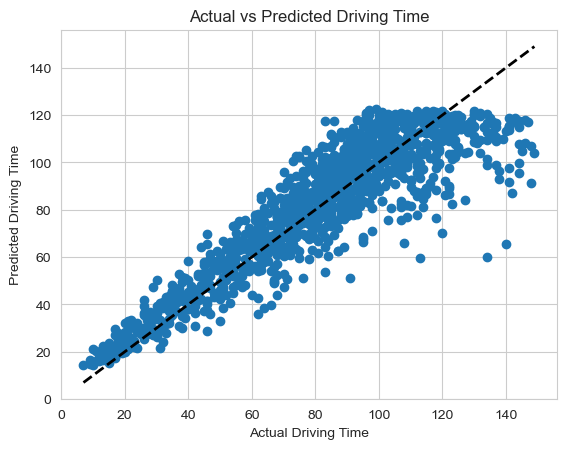

In [61]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Driving Time')
plt.ylabel('Predicted Driving Time')
plt.title('Actual vs Predicted Driving Time')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

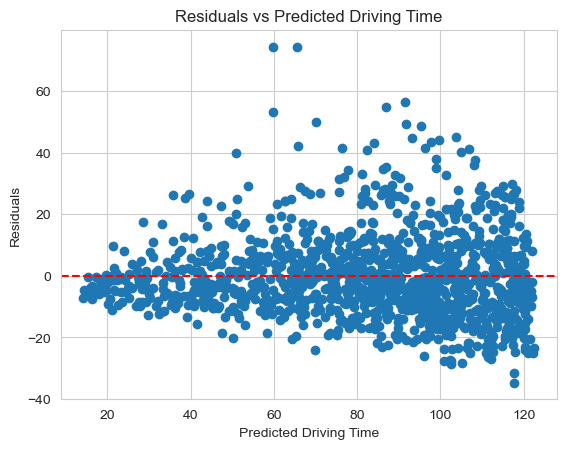

In [62]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Driving Time')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Driving Time')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [63]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", cross_val_scores)

Cross-validated R-squared scores: [0.82683805 0.82471727 0.81030479 0.79385954 0.79978309]


In [67]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

df = data
# Assume df is your dataframe and you have a column 'ruca' which is categorical.
# One-hot encoding 'ruca' column if it's not already done.
df = pd.get_dummies(df, columns=['ruca'], drop_first=True)

# Assume 'travel_time' is your target variable and the rest are features.
X = df.drop('travel_time', axis=1)
y = df['travel_time']

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop any rows with NaN values that resulted from conversion errors
X = X.dropna()
y = y.dropna()

# Add a constant to the feature matrix for the intercept.
X = sm.add_constant(X)

# Fit the model to get the residuals.
model = sm.OLS(y, X).fit()
residuals = model.resid

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model.model.exog)
bp_test_statistic, bp_p_value = bp_test[:2]

# Perform the White test
white_test = het_white(residuals, model.model.exog)
white_test_statistic, white_p_value = white_test[:2]

# Print the results
print(f'Breusch-Pagan test statistic: {bp_test_statistic}, p-value: {bp_p_value}')
print(f'White test statistic: {white_test_statistic}, p-value: {white_p_value}')

KeyError: "None of [Index(['ruca'], dtype='object')] are in the [columns]"

In [68]:
# Check the first few rows of the DataFrame to understand its structure
print(data.head())

# Check if 'ruca' is a column in the DataFrame
print('ruca' in data.columns)

# If 'ruca' is not a column, check for the presence of already one-hot encoded columns
print('ruca_Rural' in data.columns)
print('ruca_Suburban' in data.columns)
print('ruca_Urban' in data.columns)


                  origin            destination  great_circle_distance  \
0   41.295893,-93.104232   41.687183,-93.772041              43.879933   
1   38.763463,-77.186063   38.960109,-78.187619              55.570371   
2     44.12036,-69.24005   43.837601,-70.445011              63.014078   
3  47.529679,-100.271687  48.820912,-100.439464              89.549923   
4    43.54195,-114.31008  42.694082,-114.515923              59.494815   

   travel_time  ruca_Rural  ruca_Suburban  ruca_Urban  
0           55       False           True       False  
1           69       False          False        True  
2           97        True          False       False  
3          108        True          False       False  
4           75       False          False        True  
False
True
True
True


In [70]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Assume df is your dataframe and you have a column 'ruca' which is categorical.
# The DataFrame 'df' is assumed to be defined earlier and contains the data.
# Ensure 'travel_time' is your target variable and the rest are features.
X = df.drop('travel_time', axis=1)
y = df['travel_time']

# Ensure all data is numeric for the features.
X = X.apply(pd.to_numeric, errors='coerce')
# Ensure the target variable is numeric.
y = pd.to_numeric(y, errors='coerce')

# Drop any rows with NaN values that resulted from conversion errors.
X.dropna(axis=0, how='any', inplace=True)
y.dropna(axis=0, how='any', inplace=True)

# Ensure that the index of y is aligned with X after dropping NaN values.
y = y.reindex(X.index)

# Add a constant to the feature matrix for the intercept.
X = sm.add_constant(X)

# Fit the model to get the residuals.
model = sm.OLS(y, X).fit()
residuals = model.resid

# Perform the Breusch-Pagan test.
bp_test = het_breuschpagan(residuals, model.model.exog)
bp_test_statistic, bp_p_value = bp_test[:2]

# Perform the White test.
white_test = het_white(residuals, model.model.exog)
white_test_statistic, white_p_value = white_test[:2]

# Print the results.
print(f'Breusch-Pagan test statistic: {bp_test_statistic}, p-value: {bp_p_value}')
print(f'White test statistic: {white_test_statistic}, p-value: {white_p_value}')

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).